# Graphing the US State Borders

In [1]:
import pandas as pd
import networkx as nx

In [2]:
state_borders = {'AL': {'FL': {'weight': 0.01}, 'GA': {'weight': 0.01},
                        'MS': {'weight': 0.01}, 'TN': {'weight': 0.01}},
                'AK': {},
                'AZ': {'CA': {'weight': 0.01}, 'NV': {'weight': 0.01},
                       'NM': {'weight': 0.01}, 'UT': {'weight': 0.01}},
                'AR': {'LA': {'weight': 0.01}, 'MS': {'weight': 0.01},
                       'MO': {'weight': 0.01}, 'OK': {'weight': 0.01},
                       'TN': {'weight': 0.01}, 'TX': {'weight': 0.01}},
                'CA': {'AZ': {'weight': 0.01}, 'NV': {'weight': 0.01},
                       'OR': {'weight': 0.01}},
                'CO': {'KS': {'weight': 0.01}, 'NE': {'weight': 0.01},
                       'NM': {'weight': 0.01}, 'OK': {'weight': 0.01},
                       'UT': {'weight': 0.01}, 'WY': {'weight': 0.01}},
                'CT': {'MA': {'weight': 0.1}, 'NY': {'weight': 0.1},
                       'RI': {'weight': 0.1}},
                'DE': {'MD': {'weight': 0.1}, 'NJ': {'weight': 0.1},
                       'PA': {'weight': 0.1}},
                'FL': {'AL': {'weight': 0.01}, 'GA': {'weight': 0.01}},
                'GA': {'AL': {'weight': 0.01}, 'FL': {'weight': 0.01},
                       'NC': {'weight': 0.01}, 'SC': {'weight': 0.01},
                       'TN': {'weight': 0.01}},
                'HI': {},
                'ID': {'MT': {'weight': 0.01}, 'NV': {'weight': 0.01},
                       'OR': {'weight': 0.01}, 'UT': {'weight': 0.01},
                       'WA': {'weight': 0.01}, 'WY': {'weight': 0.01}},
                'IL': {'IN': {'weight': 0.01}, 'IA': {'weight': 0.01},
                       'KY': {'weight': 0.01}, 'MO': {'weight': 0.01},
                       'WI': {'weight': 0.01}},
                'IN': {'IL': {'weight': 0.01}, 'KY': {'weight': 0.01},
                       'MI': {'weight': 0.01}, 'OH': {'weight': 0.01}},
                'IA': {'IL': {'weight': 0.01}, 'MN': {'weight': 0.01},
                       'MO': {'weight': 0.01}, 'NE': {'weight': 0.01},
                       'SD': {'weight': 0.01}, 'WI': {'weight': 0.01}},
                'KS': {'CO': {'weight': 0.01}, 'MO': {'weight': 0.01},
                       'NE': {'weight': 0.01}, 'OK': {'weight': 0.01}},
                'KY': {'IL': {'weight': 0.01}, 'IN': {'weight': 0.01},
                       'MO': {'weight': 0.01}, 'OH': {'weight': 0.01},
                       'TN': {'weight': 0.01}, 'VA': {'weight': 0.01},
                       'WV': {'weight': 0.01}},
                'LA': {'AR': {'weight': 0.01}, 'MS': {'weight': 0.01},
                       'TX': {'weight': 0.01}},
                'ME': {'NH': {'weight': 0.1}},
                'MD': {'DE': {'weight': 0.1}, 'PA': {'weight': 0.01},
                       'VA': {'weight': 0.01}, 'WV': {'weight': 0.01}},
                'MA': {'CT': {'weight': 0.1}, 'NH': {'weight': 0.1},
                       'NY': {'weight': 0.1}, 'RI': {'weight': 0.1},
                       'VT': {'weight': 0.1}},
                'MI': {'IN': {'weight': 0.01}, 'OH': {'weight': 0.01},
                       'WI': {'weight': 0.01}},
                'MN': {'IA': {'weight': 0.01}, 'ND': {'weight': 0.01},
                       'SD': {'weight': 0.01}, 'WI': {'weight': 0.01}},
                'MS': {'AL': {'weight': 0.01}, 'AR': {'weight': 0.01},
                       'LA': {'weight': 0.01}, 'TN': {'weight': 0.01}},
                'MO': {'AR': {'weight': 0.01}, 'IL': {'weight': 0.01},
                       'IA': {'weight': 0.01}, 'KS': {'weight': 0.01},
                       'KY': {'weight': 0.01}, 'NE': {'weight': 0.01},
                       'OK': {'weight': 0.01}, 'TN': {'weight': 0.01}},
                'MT': {'ID': {'weight': 0.01}, 'ND': {'weight': 0.01},
                       'SD': {'weight': 0.01}, 'WY': {'weight': 0.01}},
                'NE': {'CO': {'weight': 0.01}, 'IA': {'weight': 0.01},
                       'KS': {'weight': 0.01}, 'MO': {'weight': 0.01},
                       'SD': {'weight': 0.01}, 'WY': {'weight': 0.01}},
                'NV': {'AZ': {'weight': 0.01}, 'CA': {'weight': 0.01},
                       'ID': {'weight': 0.01}, 'OR': {'weight': 0.01},
                       'UT': {'weight': 0.01}},
                'NH': {'ME': {'weight': 0.1}, 'MA': {'weight': 0.1},
                       'VT': {'weight': 0.1}},
                'NJ': {'DE': {'weight': 0.1}, 'NY': {'weight': 0.1},
                       'PA': {'weight': 0.1}},
                'NM': {'AZ': {'weight': 0.01}, 'CO': {'weight': 0.01},
                       'OK': {'weight': 0.01}, 'TX': {'weight': 0.01}},
                'NY': {'CT': {'weight': 0.1}, 'MA': {'weight': 0.1},
                       'NJ': {'weight': 0.1}, 'PA': {'weight': 0.01},
                       'VT': {'weight': 0.1}},
                'NC': {'GA': {'weight': 0.01}, 'SC': {'weight': 0.01},
                       'TN': {'weight': 0.01}, 'VA': {'weight': 0.01}},
                'ND': {'MN': {'weight': 0.01}, 'MT': {'weight': 0.01},
                       'SD': {'weight': 0.01}},
                'OH': {'IN': {'weight': 0.01}, 'KY': {'weight': 0.01},
                       'MI': {'weight': 0.01}, 'PA': {'weight': 0.01},
                       'WV': {'weight': 0.01}},
                'OK': {'AR': {'weight': 0.01}, 'CO': {'weight': 0.01},
                       'KS': {'weight': 0.01}, 'MO': {'weight': 0.01},
                       'NM': {'weight': 0.01}, 'TX': {'weight': 0.01}},
                'OR': {'CA': {'weight': 0.01}, 'ID': {'weight': 0.01},
                       'NV': {'weight': 0.01}, 'WA': {'weight': 0.01}},
                'PA': {'DE': {'weight': 0.1}, 'MD': {'weight': 0.01},
                       'NJ': {'weight': 0.01}, 'NY': {'weight': 0.01},
                       'OH': {'weight': 0.01}, 'WV': {'weight': 0.01}},
                'RI': {'CT': {'weight': 0.1}, 'MA': {'weight': 0.1}},
                'SC': {'GA': {'weight': 0.01}, 'NC': {'weight': 0.01}},
                'SD': {'IA': {'weight': 0.01}, 'MN': {'weight': 0.01},
                       'MT': {'weight': 0.01}, 'NE': {'weight': 0.01},
                       'ND': {'weight': 0.01}, 'WY': {'weight': 0.01}},
                'TN': {'AL': {'weight': 0.01}, 'AR': {'weight': 0.01},
                       'GA': {'weight': 0.01}, 'KY': {'weight': 0.01},
                       'MS': {'weight': 0.01}, 'MO': {'weight': 0.01},
                       'NC': {'weight': 0.01}, 'VA': {'weight': 0.01}},
                'TX': {'AR': {'weight': 0.01}, 'LA': {'weight': 0.01},
                       'NM': {'weight': 0.01}, 'OK': {'weight': 0.01}},
                'UT': {'AZ': {'weight': 0.01}, 'CO': {'weight': 0.01},
                       'ID': {'weight': 0.01}, 'NV': {'weight': 0.01},
                       'WY': {'weight': 0.01}},
                'VT': {'MA': {'weight': 0.1}, 'NH': {'weight': 0.1},
                       'NY': {'weight': 0.1}},
                'VA': {'KY': {'weight': 0.01}, 'MD': {'weight': 0.01},
                       'NC': {'weight': 0.01}, 'TN': {'weight': 0.01},
                       'WV': {'weight': 0.01}},
                'WA': {'ID': {'weight': 0.01}, 'OR': {'weight': 0.01}},
                'WV': {'KY': {'weight': 0.01}, 'MD': {'weight': 0.01},
                       'OH': {'weight': 0.01}, 'PA': {'weight': 0.01},
                       'VA': {'weight': 0.01}},
                'WI': {'IL': {'weight': 0.01}, 'IA': {'weight': 0.01},
                       'MI': {'weight': 0.01}, 'MN': {'weight': 0.01}},
                'WY': {'CO': {'weight': 0.01}, 'ID': {'weight': 0.01}, 
                       'MT': {'weight': 0.01}, 'NE': {'weight': 0.01},
                       'SD': {'weight': 0.01}, 'UT': {'weight': 0.01}}}

In [3]:
borders = nx.from_dict_of_dicts(state_borders)

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


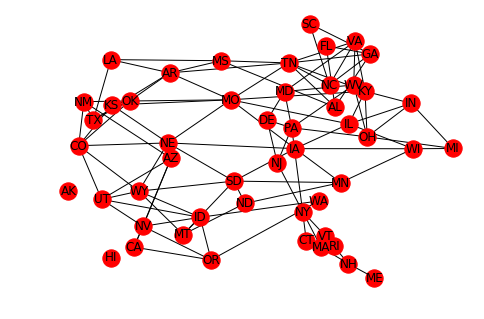

In [12]:
nx.draw(borders, with_labels=True)

In [5]:
state_borders48 = {}
for state in state_borders:
    if state_borders[state] != {}:
        state_borders48[state] = state_borders[state]

In [6]:
borders48 = nx.from_dict_of_dicts(state_borders48)

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


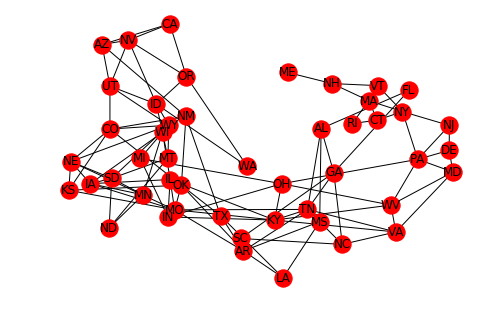

In [10]:
nx.draw(borders48, with_labels=True, random_state=42)

In [11]:
list(nx.isolates(borders))

['AK', 'HI']

In [13]:
list(nx.all_pairs_dijkstra_path(borders))

[('AL',
  {'AL': ['AL'],
   'FL': ['AL', 'FL'],
   'GA': ['AL', 'GA'],
   'MS': ['AL', 'MS'],
   'TN': ['AL', 'TN'],
   'NC': ['AL', 'GA', 'NC'],
   'SC': ['AL', 'GA', 'SC'],
   'AR': ['AL', 'MS', 'AR'],
   'LA': ['AL', 'MS', 'LA'],
   'KY': ['AL', 'TN', 'KY'],
   'MO': ['AL', 'TN', 'MO'],
   'VA': ['AL', 'TN', 'VA'],
   'OK': ['AL', 'MS', 'AR', 'OK'],
   'TX': ['AL', 'MS', 'AR', 'TX'],
   'IL': ['AL', 'TN', 'KY', 'IL'],
   'IN': ['AL', 'TN', 'KY', 'IN'],
   'OH': ['AL', 'TN', 'KY', 'OH'],
   'WV': ['AL', 'TN', 'KY', 'WV'],
   'IA': ['AL', 'TN', 'MO', 'IA'],
   'KS': ['AL', 'TN', 'MO', 'KS'],
   'NE': ['AL', 'TN', 'MO', 'NE'],
   'MD': ['AL', 'TN', 'VA', 'MD'],
   'CO': ['AL', 'MS', 'AR', 'OK', 'CO'],
   'NM': ['AL', 'MS', 'AR', 'OK', 'NM'],
   'WI': ['AL', 'TN', 'KY', 'IL', 'WI'],
   'MI': ['AL', 'TN', 'KY', 'IN', 'MI'],
   'PA': ['AL', 'TN', 'KY', 'OH', 'PA'],
   'MN': ['AL', 'TN', 'MO', 'IA', 'MN'],
   'SD': ['AL', 'TN', 'MO', 'IA', 'SD'],
   'WY': ['AL', 'TN', 'MO', 'NE', 'WY'],
  

In [14]:
nx.average_clustering(borders48)

0.48968253968253966

In [15]:
nx.degree_histogram(borders)

[2, 1, 4, 9, 13, 9, 9, 1, 2]

In [16]:
nx.average_degree_connectivity(borders48)

{4: 4.903846153846154,
 6: 5.148148148148148,
 3: 4.2592592592592595,
 2: 4.5,
 5: 4.7555555555555555,
 7: 5.714285714285714,
 1: 3.0,
 8: 5.6875}

In [17]:
nx.average_neighbor_degree(borders48)

{'AL': 4.75,
 'AZ': 4.25,
 'AR': 5.5,
 'CA': 4.333333333333333,
 'CO': 5.166666666666667,
 'CT': 4.0,
 'DE': 4.333333333333333,
 'FL': 4.5,
 'GA': 4.0,
 'ID': 4.333333333333333,
 'IL': 5.8,
 'IN': 5.0,
 'IA': 5.5,
 'KS': 6.5,
 'KY': 5.714285714285714,
 'LA': 4.666666666666667,
 'ME': 3.0,
 'MD': 4.75,
 'MA': 3.2,
 'MI': 4.333333333333333,
 'MN': 4.75,
 'MS': 5.25,
 'MO': 6.0,
 'MT': 5.25,
 'NE': 6.0,
 'NV': 4.4,
 'NH': 3.0,
 'NJ': 4.666666666666667,
 'NM': 5.0,
 'NY': 4.0,
 'NC': 5.0,
 'ND': 4.666666666666667,
 'OH': 5.0,
 'OK': 5.333333333333333,
 'OR': 4.0,
 'PA': 4.166666666666667,
 'RI': 4.0,
 'SC': 4.5,
 'SD': 4.833333333333333,
 'TN': 5.375,
 'TX': 4.75,
 'UT': 5.4,
 'VT': 4.333333333333333,
 'VA': 5.6,
 'WA': 5.0,
 'WV': 5.4,
 'WI': 4.5,
 'WY': 5.5}

In [18]:
nx.average_shortest_path_length(borders48)

4.168439716312057

In [19]:
nx.node_clique_number(borders)

{'AL': 3,
 'AK': 1,
 'AZ': 3,
 'AR': 3,
 'CA': 3,
 'CO': 3,
 'CT': 3,
 'DE': 3,
 'FL': 3,
 'GA': 3,
 'HI': 1,
 'ID': 3,
 'IL': 3,
 'IN': 3,
 'IA': 3,
 'KS': 3,
 'KY': 3,
 'LA': 3,
 'ME': 2,
 'MD': 3,
 'MA': 3,
 'MI': 3,
 'MN': 3,
 'MS': 3,
 'MO': 3,
 'MT': 3,
 'NE': 3,
 'NV': 3,
 'NH': 3,
 'NJ': 3,
 'NM': 3,
 'NY': 3,
 'NC': 3,
 'ND': 3,
 'OH': 3,
 'OK': 3,
 'OR': 3,
 'PA': 3,
 'RI': 3,
 'SC': 3,
 'SD': 3,
 'TN': 3,
 'TX': 3,
 'UT': 3,
 'VT': 3,
 'VA': 3,
 'WA': 3,
 'WV': 3,
 'WI': 3,
 'WY': 3}

In [21]:
nx.betweenness_centrality(borders48)

{'AL': 0.02179451240505819,
 'AZ': 0.04833143468364481,
 'AR': 0.07883618719650172,
 'CA': 0.003103888094637401,
 'CO': 0.06580445579259077,
 'CT': 0.01942645698427382,
 'DE': 0.0027765070780796956,
 'FL': 0.0,
 'GA': 0.03571176485145033,
 'ID': 0.0885033686455478,
 'IL': 0.04390375549563193,
 'IN': 0.014227617569874309,
 'IA': 0.08191052764793336,
 'KS': 0.015790054585151717,
 'KY': 0.28540785133974644,
 'LA': 0.003210788594692388,
 'ME': 0.0,
 'MD': 0.05059772241179293,
 'MA': 0.0633672525439408,
 'MI': 0.03965160409149942,
 'MN': 0.02946605951212371,
 'MS': 0.015738901862861157,
 'MO': 0.35891442260482853,
 'MT': 0.01844288139787476,
 'NE': 0.1605104596296623,
 'NV': 0.011894640617039364,
 'NH': 0.0425531914893617,
 'NJ': 0.0032377428307123037,
 'NM': 0.07542009711498511,
 'NY': 0.22802960222016652,
 'NC': 0.03386507880032394,
 'ND': 0.004578191051062387,
 'OH': 0.1626540185201946,
 'OK': 0.1120098979347662,
 'OR': 0.005617267809078935,
 'PA': 0.296461795434578,
 'RI': 0.0,
 'SC': 0

In [29]:
# Exercise 1:

# Which state has the highest betweenness centrality?

# HINT: Use the tools inside networkx!

for key, val in nx.betweenness_centrality(borders48).items():
    if val == max(nx.betweenness_centrality(borders48).values()):
        print(key)

MO


In [32]:
# Exercise 2:

# Which state has the highest degree centrality?

for key, val in nx.degree_centrality(borders48).items():
    if val == max(nx.degree_centrality(borders48).values()):
        print(key)

MO
TN


In [33]:
# Exercise 3:

# Which state has the highest closeness centrality?

for key, val in nx.closeness_centrality(borders48).items():
    if val == max(nx.closeness_centrality(borders48).values()):
        print(key)

MO


In [35]:
# Exercise 4:

# Which border has the highest betweenness centrality?

# And what is the interpretation of this?

for key, val in nx.edge_betweenness_centrality(borders48).items():
    if val == max(nx.edge_betweenness_centrality(borders48).values()):
        print(key)

('NY', 'PA')
